In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#### Se realiza la carga de los datos procesados.

In [2]:
filtro_normal_PT = pd.read_csv('Datasets\filtro_normal_PT.csv')
top_geneScore = pd.read_csv('Datasets\top_geneScore.csv')
top_genes = pd.read_csv('Datasets\top_genes.csv')

In [3]:
filtro_normal_PT.head()

,sample_type,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284024,ENSG00000284976,ENSG00000285410,ENSG00000285756,ENSG00000285967,ENSG00000286208,ENSG00000286379,ENSG00000286388,ENSG00000286451,ENSG00000288066
0,Solid Tissue Normal,4209,1611,1217,346,787,5013,1691,2067,2148,...,940,681,1050,568,746,332,341,278,718,605
1,Solid Tissue Normal,2761,1178,611,165,651,5745,1205,2415,1170,...,641,304,704,317,726,6,266,317,216,570
2,Solid Tissue Normal,6679,2240,1980,458,442,1982,1577,2296,2405,...,1305,848,1454,1034,763,169,198,317,859,867
3,Solid Tissue Normal,3541,1353,947,259,936,7470,2097,2511,1840,...,884,645,1018,422,1104,15,377,378,237,600
4,Solid Tissue Normal,2746,1047,335,81,692,4576,1726,1768,729,...,420,336,713,58,534,0,6,132,2,660


In [4]:
top_genes.head()

,HGNC.symbol,Count,Ensembl.ID
0,TP53,279.0,ENSG00000141510
1,EP300,250.0,ENSG00000100393
2,CREBBP,248.0,ENSG00000005339
3,YWHAG,237.0,ENSG00000170027
4,SMAD3,210.0,ENSG00000166949


In [5]:
top_geneScore.head()

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787


#### Comenzamos con la creación del modelo de Regresión Logística utilizando los 100 genes como predictores obtenidos de la 'RED_PPI'.

In [7]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_genes = top_genes['Ensembl.ID']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_genes.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística
logreg_model = LogisticRegression(C=0.1, random_state=42)

In [8]:
# Entrenar el modelo con características estandarizadas
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, random_state=42)

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test_scaled)

In [10]:
# Evaluar el rendimiento del modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

# Mostrar los resultados
print(f'Accuracy del modelo de regresión logística: {accuracy_logreg}')
print('Classification Report del modelo de regresión logística:\n', classification_rep_logreg)

Accuracy del modelo de regresión logística: 0.9836065573770492
Classification Report del modelo de regresión logística:
                      precision    recall  f1-score   support

      Primary Tumor       0.98      1.00      0.99       222
Solid Tissue Normal       1.00      0.82      0.90        22

           accuracy                           0.98       244
          macro avg       0.99      0.91      0.95       244
       weighted avg       0.98      0.98      0.98       244



Capacidad de Generalización: La precisión del 98% en el conjunto de datos de prueba es un indicador positivo de la capacidad de generalización del modelo.

Sesgo de Clase: Se observan más instancias de la clase 'Primary Tumor' que de la clase 'Solid Tissue Normal' (222 frente a 22), lo que sugiere un desequilibrio en el conjunto de datos. A pesar de esto, el modelo muestra un buen rendimiento para ambas clases, indicando una gestión eficaz del desequilibrio de clases.

Recall: Para la clase "Primary Tumor" es perfecto (1.00), lo que significa que el modelo identifica correctamente todos los casos positivos de esta clase. 

Sensibilidad a 'Solid Tissue Normal': La precisión para la clase 'Solid Tissue Normal' es alta del (1.00), mientras que el recall es del 82%. Esto podría indicar que el modelo podría estar perdiendo algunos casos de 'Solid Tissue Normal', pero a pesar de eso, muestra un rendimiento sólido.

F1-score: Combina precisión y recall en un solo número. En general, es alto para ambas clases, indicando un buen equilibrio entre precisión y recall.

Macro y Weighted Avg: Las métricas macro avg (promedio no ponderado de las métricas por clase) muestran un 99% para precisión, 91% para recall y 95% para f1-score. 

En cuanto a weighted avg (promedio ponderado según el soporte de cada clase), se observan valores del 98% para precisión, 98% para recall y 98% para f1-score. Ambas indican un rendimiento alto y equilibrado del modelo.

En conclusión, estos resultados respaldan la solidez del modelo.

#### Se crea un segundo modelo de Regresión Logística utilizando los 100 genes como predictores obtenidos de 'geneScore' (PIK3R1).

In [16]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_genescore = top_geneScore['features']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_genescore.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1)
X_test_scaled1 = scaler1.transform(X_test1)

# Definir el modelo de regresión logística
logreg_model1 = LogisticRegression(C=0.1, random_state=42)

In [17]:
# Entrenar el modelo con características estandarizadas
logreg_model1.fit(X_train_scaled1, y_train1)

LogisticRegression(C=0.1, random_state=42)

In [18]:
# Realizar predicciones en el conjunto de prueba
y_pred_logreg1 = logreg_model1.predict(X_test_scaled1)

In [19]:
# Evaluar el rendimiento del modelo
accuracy_logreg = accuracy_score(y_test1, y_pred_logreg1)
classification_rep_logreg = classification_report(y_test1, y_pred_logreg1)

# Mostrar los resultados
print(f'Accuracy del modelo de regresión logística: {accuracy_logreg}')
print('Classification Report del modelo de regresión logística:\n', classification_rep_logreg)

Accuracy del modelo de regresión logística: 0.9877049180327869
Classification Report del modelo de regresión logística:
                      precision    recall  f1-score   support

      Primary Tumor       1.00      0.99      0.99       222
Solid Tissue Normal       0.91      0.95      0.93        22

           accuracy                           0.99       244
          macro avg       0.95      0.97      0.96       244
       weighted avg       0.99      0.99      0.99       244



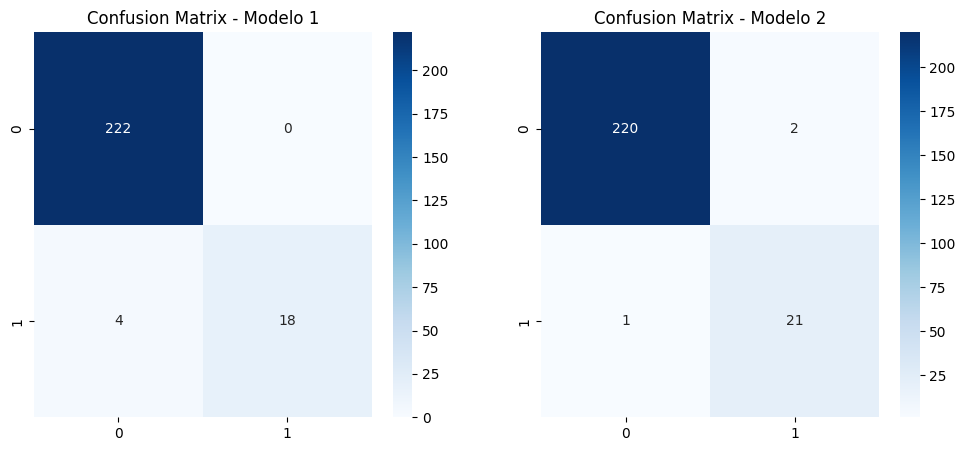

In [20]:
# Matriz de confusión para el primer modelo
cm1 = confusion_matrix(y_test, y_pred_logreg)  # Asegúrate de reemplazar y_true y y_pred1 con tus datos reales y predichos

# Matriz de confusión para el segundo modelo
cm2 = confusion_matrix(y_test1, y_pred_logreg1)  # Asegúrate de reemplazar y_true y y_pred2 con tus datos reales y predichos

# Crear subplots para comparar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión para el primer modelo
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Modelo 1')

# Matriz de confusión para el segundo modelo
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Modelo 2')

plt.show()

Se llevó a cabo el entrenamiento de un segundo modelo utilizando como predictores los 100 genes con mayor puntaje obtenidos de 'geneScore', los cuales fueron identificados a través del gen 'PIK3R1'.

Accuracy: 98.77%, observándose una ligera mejora en comparación con el primer modelo.

Precision: La precisión para la clase "Primary Tumor" sigue siendo alta (1.00), pero para la clase "Solid Tissue Normal" disminuye ligeramente a 91%.

Recall: Se mejora para la clase "Solid Tissue Normal" al 95%, indicando una mejor identificación de los casos positivos para esta clase.

F1-score: En general, sigue siendo alto para ambas clases, pero hay un ligero aumento para la clase "Solid Tissue Normal".

Macro avg y Weighted avg: Permanecen altos, indicando un buen rendimiento general.

En general, ambos modelos tienen un rendimiento muy bueno, con precisiones y recalls altos. El segundo modelo muestra una ligera mejora en la precisión global (accuracy) y un mejor recall para la clase "Solid Tissue Normal".